In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import cmath

In [2]:
v=0.001*1e+15

In [3]:
def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
I = np.vectorize(Cauchy)

def lambda_z(w, v, z):
    kappa=0.011
    A=1j*w/v
    B=(1-A)*1e+30*4/(v*9*1e+20*9*1e-31*(1.1*10500)**2)
    return (A**2+kappa**2*z**2-(B*z**4)/A-z*5*B*I(z)/A)

In [10]:
def lambda_plus(w, v, z, kappa):
    A=1-1j*w/v
    B=(1-A)*1e+30*4/(v*9*1e+20*9*1e-31*(1.1*10500)**2)
    #B=-2*A*kappa**2
    y=1-B*z**4/(A*(A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/(A*(A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*A*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)/(z+1j)**2
lambda_plus = np.vectorize(lambda_plus)

def lambda_minus(w, v, z, kappa):
    A=1-1j*w/v
    #B=(1-A)*1e+30*4/(v*9*1e+20*9*1e-31*(1.1*10500)**2)
    B=-2*A*kappa**2
    y=1-B*z**4/(A*(A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/(A*(A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*A*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)
lambda_minus= np.vectorize(lambda_minus)

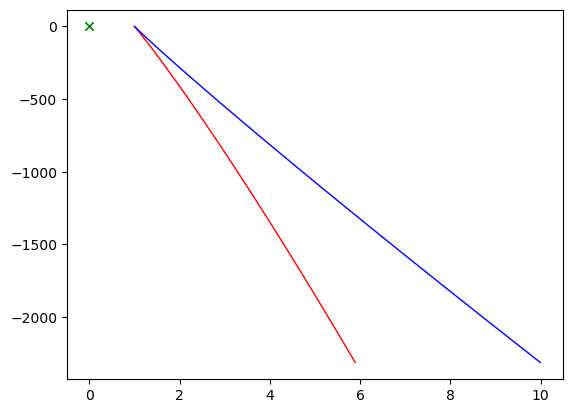

In [11]:
w=0.1*1e+10
kappa=0.75

plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-0.0005,0, 50000)
y=lambda_plus(w, v, z, kappa)
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,0.0005, 50000)
y=lambda_plus(w, v, z, kappa)
plt.plot(y.real,y.imag,color='b',lw=1)

plt.show()

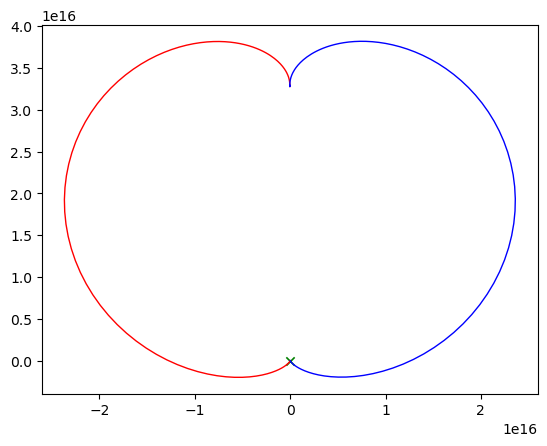

In [12]:
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-1500,0, 50000)
y=lambda_plus(w, v, z, kappa)#/1e16
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,1500, 50000)
y=lambda_plus(w, v, z, kappa)#/1e16
plt.plot(y.real,y.imag,color='b',lw=1)

plt.show()

In [7]:
A=1-1j*w/v
B=(1-A)*1e+30*4/(v*9*1e+20*9*1e-31*(1.1*10500)**2)
(1+B/(2*A*kappa**2))*kappa**2

(-18508898508916.445+1.8508898508917012e+16j)

In [8]:
1j*A/kappa

(0.0013333333333333333+1.3333333333333333j)

In [9]:
lambda_plus(w, v, 0, kappa)

array(-0.999999+0.002j)